In [1]:
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

In [2]:
from pathlib import Path

IMAGES_PATH = Path() / "images" / "classification"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [3]:
from sklearn.datasets import fetch_openml

# 사이킷런 1.2에서 추가된 parser 매개변수 기본값이 1.4 버전에서 'liac-arff'에서 'auto'로 바뀝니다.
# 'auto'일 경우 희소한 ARFF 포맷일 때는 'liac-arff', 그렇지 않을 때는 'pandas'가 됩니다.
# 이에 대한 경고를 피하려면 parser='auto'로 지정하세요.
mnist = fetch_openml('mnist_784', as_frame=False)

In [4]:
X, y = mnist.data, mnist.target
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [5]:
X, y = mnist.data, mnist.target
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import SGDClassifier
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train.astype("float64"))
sgd_clf = SGDClassifier(random_state=42)


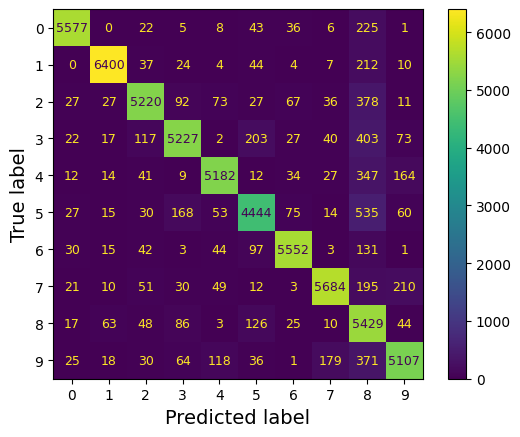

In [9]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
plt.rc('font', size=9)  # 추가 코드 - 폰트 크기를 줄입니다
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred)
plt.show()

In [41]:
import cx_Oracle
import _pickle as cPickle
conn = cx_Oracle.connect('rquser', 'nebula', 'FREE')
cursor=conn.cursor()
binary_y = cursor.var(cx_Oracle.BLOB)
binary_y_pred = cursor.var(cx_Oracle.BLOB)

y_train_dump = cPickle.dumps(y_train)
y_pred_dump = cPickle.dumps(y_train_pred)


binary_y.setvalue(0, y_train_dump)
binary_y_pred.setvalue(0, y_pred_dump)

cursor.execute("INSERT INTO CONFUSION_MATRIX(MODEL_NAME, Y, Y_PRED) VALUES(:1,:2,:3)", 
       ['SGDClassifier',binary_y, binary_y_pred])

In [43]:
conn.commit()

<Figure size 1000x1000 with 0 Axes>

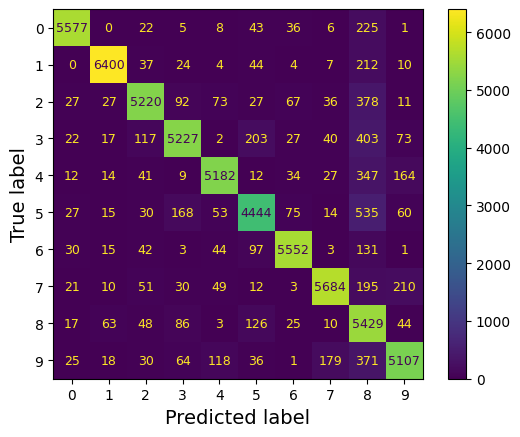

In [29]:
ConfusionMatrixDisplay.figure_ = plt.figure(figsize=(10,10))
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred)
plt.show()

In [33]:
plt.show()

filename : /tmp/3434.png


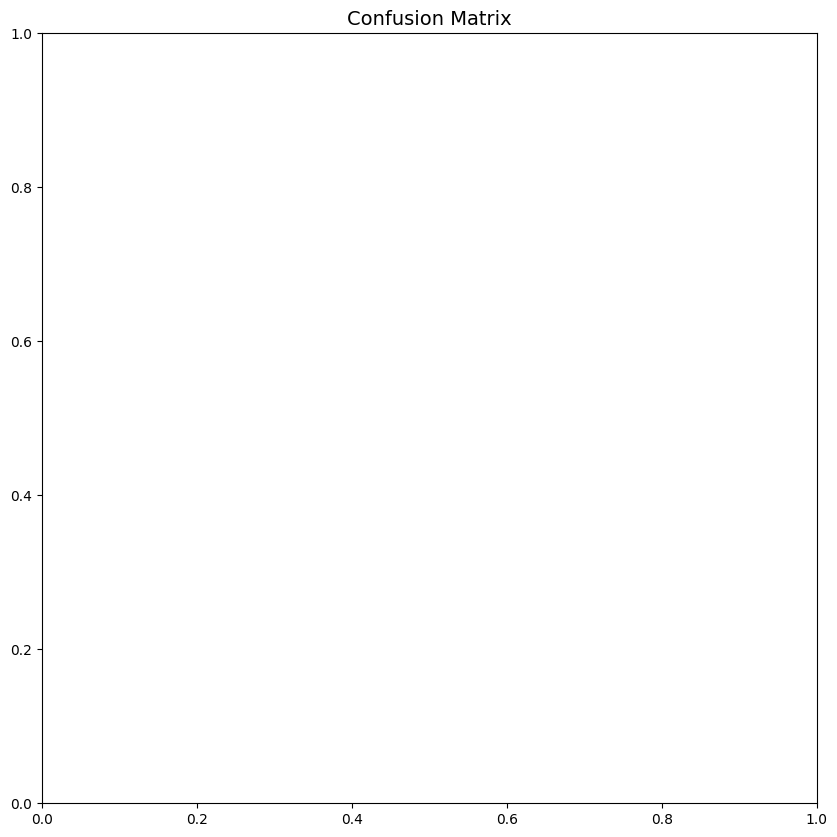

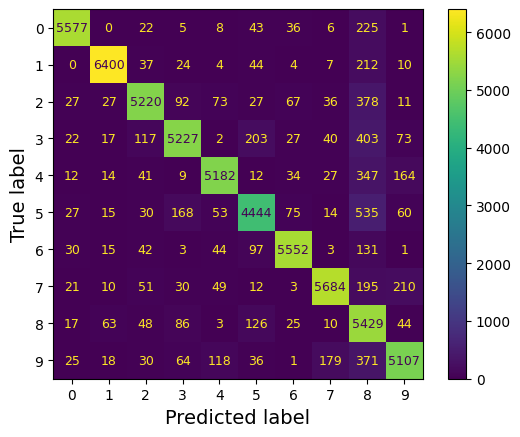

In [37]:
import base64
from matplotlib import style
import os
import sys
import urllib
import base64
import pandas as pd


ConfusionMatrixDisplay.figure_ = plt.figure(figsize=(10,10))
plt.title('Confusion Matrix')
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred)
tmp_file_name = '/tmp/' + str(random.randint(100,10000)) + '.png'
print('filename : ' + tmp_file_name)
plt.savefig(tmp_file_name)
image = open(tmp_file_name, 'rb')
image_read = image.read()
image_64_encode = base64.b64encode(image_read)
uri = '<img src="data:img/png;base64,' + image_64_encode.decode() + '">'
html_str = "<html><body>" + uri + "</body></html>"
datax ={'IMG' : [html_str]}
pdf = pd.DataFrame(datax)
pdf.head()

f = open("/tmp/confusion_matrix.html", "w")
f.write(html_str)
f.close()


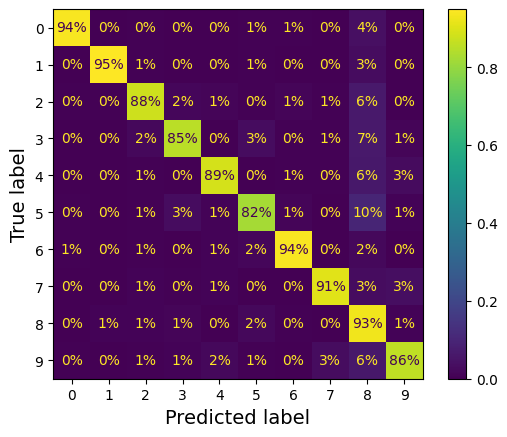

In [38]:
plt.rc('font', size=10)  # 추가 코드
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred,
                                        normalize="true", values_format=".0%")
plt.show()

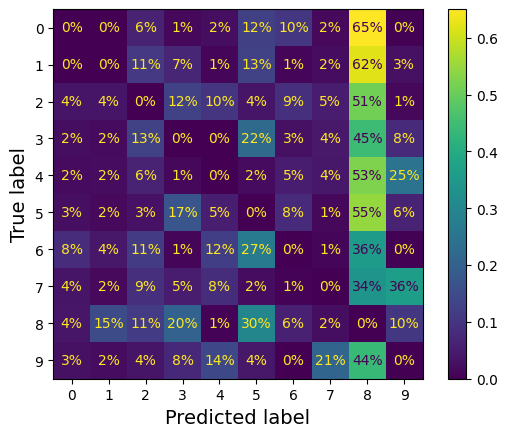

In [39]:
sample_weight = (y_train_pred != y_train)
plt.rc('font', size=10)  # 추가 코드
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred,
                                        sample_weight=sample_weight,
                                        normalize="true", values_format=".0%")

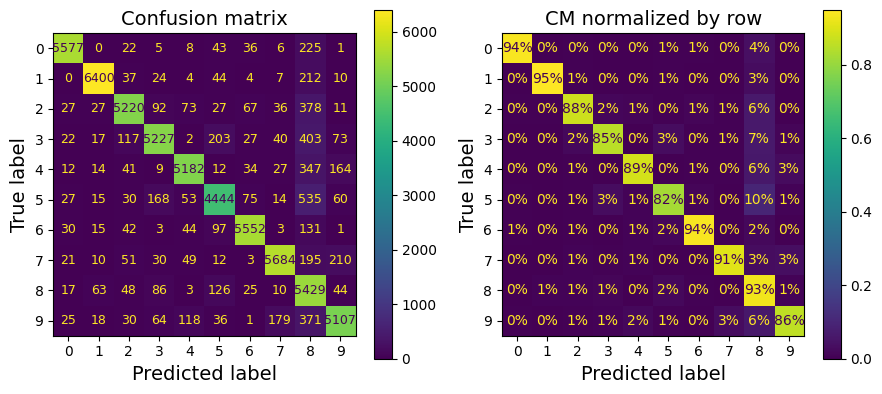

In [40]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(9, 4))
plt.rc('font', size=9)
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred, ax=axs[0])
axs[0].set_title("Confusion matrix")
plt.rc('font', size=10)
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred, ax=axs[1],
                                        normalize="true", values_format=".0%")
axs[1].set_title("CM normalized by row")
save_fig("confusion_matrix_plot_1")
plt.show()

In [4]:
import tempfile
import os
tf = tempfile.NamedTemporaryFile()
os.remove(tf.name)

Exception ignored in: <function _TemporaryFileCloser.__del__ at 0x7fc2c3f43280>
Traceback (most recent call last):
  File "/home/oracle/anaconda3/envs/tf39/lib/python3.9/tempfile.py", line 461, in __del__
    self.close()
  File "/home/oracle/anaconda3/envs/tf39/lib/python3.9/tempfile.py", line 457, in close
    unlink(self.name)
FileNotFoundError: [Errno 2] No such file or directory: '/tmp/tmpvvri9ftg'
